# Neural Networks

Why do we need another learning algorithm?

If we have data which is nonlinear separable we need to define the features for our Logistic Regression algorithm such that we include enough polynomial terms. The more features that we have, the more complex would to build the polynomial terms. It also brings the risk of overfitting and becoming computationally expensive.

One example, where our feature vector is very large is Image Classification: For a 50x50 pixel image, we have 2500 features on a grey scale image and 7500 on an RBG image. If we introduce nonlinear feature combination, we would have more than 3 million features which would be too big to compute.

What if we could have an algorithm which automatically finds the relevant features for us? 

Neural Networks can do that. They are very good for training sets with large features. 

### What is a Neutal Networks:
Neural Networks try to mimic the human brain. More specifically, they simulate the neurons in the brain. 
The parts of the Neuron that we want to focus on the **Dendrites**, the **cell body** and the **Axon**. The Dendrites are connected to other neurons and "receive input". We think of them as input wires. The **cell body** performs some calculation and passes some output to the Axon. The Axon acts like an output wire which passes results to the Dendrites of other Neurons. 

On a simplistic view, a neuron is a computational unit which gets a number of inputs, does some computation and sends the output to other neurons. The communication between the neurons are performed through a pulse of electricity which can vary by strength. 

![Human Neuron](../data/week3/Neuron.png)

From a computational perspective, we can look at one neuron as a Logistic unit which takes a few inputs via the input wires, does some computation and returns some output. The computation (as given by the name) is logistic (i.e. $y = h_\theta(x) = \frac{1}{1+e^-\theta^Tx}$). The parameters $\theta$ are often also referred as weights.

![Human Neuron](../data/week3/Artificial_Neuron.png)

### Neural Network

If we connect multiple neurons, we obtain a Neural Network. A Neural Network consists of the **Input layer** which takes input values and passes them on to our neurons in the **hidden layer**. The combined output of the final hidden layer is the **output layer**. Note that we are not restricted to a single hidden layer or a single output neuron. 

Additionally, we can see that we add a bias unit which always outputs 1 to every layer. Since the figure below has only exactly one hidden layer, we have an **Autoencoder** which we can use to effectively learn feature compression. 

![Human Neuron](../data/week3/Neural_Network.png)

#### Notation
- $a^{(j)}_i$ = "activation" of unit $i$ in layer $j$
- $\Theta^{(j)}$ = matrix of weights controlling function mapping from layer $j$ to layer $j+1$

Let's do a sample calculation of the output for the network below:
![Human Neuron](../data/week3/Neural_Network1.png)

\begin{align}
&a_1^{(2)} = g(\Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_2 + \Theta^{(1)}_{13}x_3)\\
&a_2^{(2)} = g(\Theta^{(1)}_{20}x_0 + \Theta^{(1)}_{21}x_1 + \Theta^{(1)}_{22}x_2 + \Theta^{(1)}_{23}x_3)\\
&a_3^{(2)} = g(\Theta^{(1)}_{30}x_0 + \Theta^{(1)}_{31}x_1 + \Theta^{(1)}_{32}x_2 + \Theta^{(1)}_{33}x_3)\\
h_\Theta(x) = &a_1^{(3)} = g(\Theta^{(2)}_{10}a^{(2)}_0 + \Theta^{(2)}_{11}a^{(2)}_1 + \Theta^{(2)}_{12}a^{(2)}_2 + \Theta^{(2)}_{13}a^{(2)}_3)\\
\end{align}

We can perform this computation more efficiently in a vectorized fashion.
We define:

\begin{align}
z_1^{(2)} = \Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_2 + \Theta^{(1)}_{13}x_3\\
z_2^{(2)} = \Theta^{(1)}_{20}x_0 + \Theta^{(1)}_{21}x_1 + \Theta^{(1)}_{22}x_2 + \Theta^{(1)}_{23}x_3\\
z_3^{(2)} = \Theta^{(1)}_{30}x_0 + \Theta^{(1)}_{31}x_1 + \Theta^{(1)}_{32}x_2 + \Theta^{(1)}_{33}x_3\\
\end{align}

and therefore, 
\begin{align}
a_1^{(2)} = g(z_1^{(2)})\\
a_2^{(2)} = g(z_2^{(2)})\\
a_3^{(2)} = g(z_3^{(2)})\\
\end{align}

We can define the vectors:

\begin{align}
  x = 
  \begin{bmatrix}
    x_{0}\\
    x_{1}\\
    x_{2}\\
    x_{3}\\
  \end{bmatrix}
  \quad\quad\quad
  z^{(2)} = 
  \begin{bmatrix}
  z^{(2)}_1\\  
  z^{(2)}_2\\  
  z^{(2)}_3\\  
  \end{bmatrix}
\end{align}


\begin{align}
z^{(2)} = \Theta^{(1)}x\\
a^{(2)} = g(z^{(2)})
\end{align}

Further, we will define $a^{(1)} = x$ such that we can write: $z^{(2)} = \Theta^{(1)}a^{(1)}$

Lastly, we add $a_0^{(2)} = 1$ to $z^{(2)}$ to add the bias value.

\begin{align}
z^{(3)} = \Theta^{(1)}a^{(2)}\\
h_\Theta(x) = g(z^{(3)})
\end{align}

This whole process of calculating the hypothesis is called **forward propagation**. 

## Example 1 - XNOR

Consider the problem where $x_1, x_2$ are binary (0 or 1) and $y = \neg(x_1 \bigoplus x_2)$. This gives us the following four points.
If we add some noise to the datapoints, we would have a non-linear classification problem which is hard to solve with logistic regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

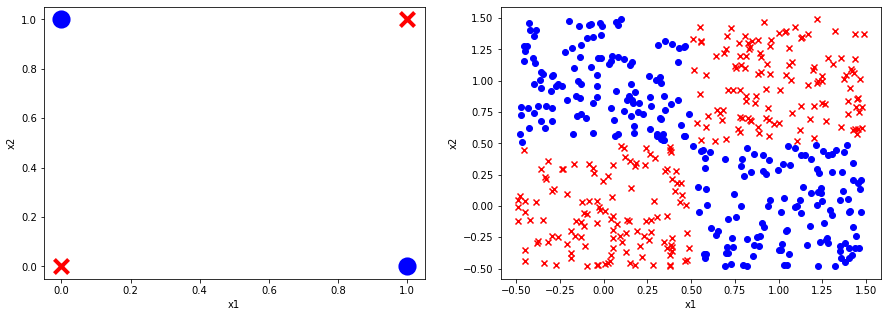

In [2]:
x1 = [0, 1, 0, 1]
x2 = [0, 1, 1, 0]

fig, (ax4, axn) = plt.subplots(1, 2, figsize=(15,5))
ax4.scatter(x1[0:2], x2[0:2], s=200, marker='x', color='r', linewidth=4)
ax4.scatter(x1[2:4], x2[2:4], s=200, marker='o', color='b', linewidth=4)
ax4.set_xlabel('x1')
ax4.set_ylabel('x2')

salt = 0.49
n = 500
quaterN = (int)(n/4)
x1n = np.array([np.zeros(quaterN), np.ones(quaterN), np.zeros(quaterN), np.ones(quaterN)])
x1n = x1n.flatten() + np.random.uniform(low=-salt, high=salt, size=(4*quaterN,))

x2n = np.array([np.zeros(quaterN), np.ones(quaterN), np.ones(quaterN), np.zeros(quaterN)])
x2n = x2n.flatten() + np.random.uniform(low=-salt, high=salt, size=(4*quaterN,))

axn.scatter(x1n[0:2*quaterN], x2n[0:2*quaterN], marker='x', color='r')
axn.scatter(x1n[2*quaterN+1:-1], x2n[2*quaterN+1:-1], marker='o', color='b')
axn.set_xlabel('x1')
axn.set_ylabel('x2')
plt.show()

We can represent an XNOR with simple logic as $y = x_1 \land x_2 \lor \neg x_1 \land \neg x_2$ which is mathematically equivalent to $y = x_1*x_2 + (1-x_1)*(1-x_2)$.

In oder to understand how a Neural Network may come up with this representation, we first need to understand how an **and gate** can work with a single neuron. The input layer contains $x_1$ and $x_2$ and the bias value. Recall that we the orange neuron will map the weighted input in the range (0,1) with the Sigmoid function where we define $y=0$, if $g(z)<0.5$ and $y=1$ if $g(z)>0.5$. I.e. $y=1$, if $z>0.5$ and $y=0$, if $z<0.5$.

If we choose weights $\theta = [-3, 2, 2]$, we can see that $h\Theta(x) = \Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_2 + \Theta^{(1)}_{13}x_3$ ($x_0=1$ because it is the bias) takes the following values for the different options:

| $x_1$ | $x_2$ | $g(z)$ | $h_\theta(x)$|
|:---:|:---:|:---:|:---:| 
|0    | 0   |-3|0|
|0    | 1   |-1|0|
|1    | 0   |-1|0|
|1    | 1   |1|1|

![NeuronAnd](../data/week3/AndANN.jpg)

Likewise we can use an **or gate** with a single neuron, where the hypothesis is: $g(-10 + 20x_1 + 20x_2)$
![NeuronAnd](../data/week3/OrANN.png)

Finally, to fully represent the XNOR, we also need to know how to build a **not gate** with a neuron:

![NeuronAnd](../data/week3/NotANN.jpg)

With these components in place, we can build the **XNOR**.

The green arrows are the and gate ($x_1 \land x_2$)

The blue arrows are the not $x_1$ and not $x_2$ ($\neg x_1 \land \neg x_2$)

The red arrows combine the two results in an or ($a^{(2)}_1 \lor a^{(2)}_2$)

| $x_1$ | $x_2$ | $a^{(2)}_1$ |$a^{(2)}_2$| $a^{(3)}_1$|
|:---:|:---:|:---:|:---:|:---:| 
|0    | 0   |0|1|1|
|0    | 1   |0|0|0|
|1    | 0   |0|0|0|
|1    | 1   |1|0|1|

![NeuronAnd](../data/week3/XNOR.png)


## Multiclass prediction

Multiclass prediction is basically the same. We build a network with n output units. Each of the output units will return a value/certainty and we can simply take the maximum value. 
![NeuronAnd](../data/week3/Multiclass.png)

## Learning with Neural Networks - Backpropagation

<!-- Maybe Gradient vanishing different node architectures LSTM GRU, etc.-->
To train the neural networks, we will use a generalization of the cost function of the Logistic Regression cost function.

**Logistic Regression**:

\begin{align}
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m y^{(i)} log \; h_\theta (x^{(i)}) + (1-y^{(i)}) \; log \; (1-h_\theta (x^{(i)})) \right] + \underbrace{\frac{\lambda}{2m}\sum^n_{j=1}\theta^2_j}_\text{Regularization}
\end{align}

**Neural Network** (with K outputs and L layers and $s_l$ units in layer $l$): 
\begin{align}
h_\theta(x) \in \mathbb{R}^K \quad (h_\Theta(x))_i=i^{th} \text{ output}
\end{align}

\begin{align}
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log \; h_\Theta (x^{(i)})_k + (1-y_k^{(i)}) \; log \; (1-h_\Theta (x^{(i)}))_k \right] + \underbrace{\frac{\lambda}{2m}\sum^{L-1}_{l=1}\sum^{s_l}_{i=1}\sum^{s_{l+1}}_{j=1}(\Theta^{(l)}_{ji})^2}_\text{Regularization}
\end{align}

In order to minimize the cost function $J(\Theta)$ (e.g. via gradient descent), we need to compute 
- $J(\Theta)$
- $\frac{\partial}{\partial \Theta^{(l)}_{ij}} J(\Theta)$

Consider the multi class network above.
Given a single training example $(x,y)$, we first apply forward propagation to compute the prediction of the network:

\begin{align}
a^{(1)} &= x\\
z^{(2)} &= \Theta^{(1)}a^{(1)}\\
a^{(2)} &= g(z^{(2)} (and bias a_0^{(2)})\\
z^{(3)} &= \Theta^{(2)}a^{(2)}\\
a^{(3)} &= g(z^{(3)} (and bias a_0^{(3)})\\
z^{(4)} &= \Theta^{(3)}a^{(3)}\\
a^{(4)} &= h_\Theta(x) = g(z^{(4)}\\
\end{align}

In order to compute the derivatives, we will use **backpropagation**:\
Intuition: $\delta^{(l)}_j = $ "error" of node $j$ in layer $l$.

For each output unit (layer L=4) we compute $\delta^{(4)}_j = a^{(4)}_j -y_j$\
Vectorized, we can write $\delta^{(4)} = a^{(4)} - y$

We then compute the error terms for the other layers:\
$\delta^{(3)} = (\Theta^{(3)})^T\delta^{(4)} .\times g'(z^{(3)}) \quad = \quad (\Theta^{(3)})^T\delta^{(4)} .\times a^{(3)} . \times (1-a^{(3)})$\
$\delta^{(2)} = (\Theta^{(2)})^T\delta^{(3)} .\times g'(z^{(2)}) \quad = \quad (\Theta^{(2)})^T\delta^{(3)} .\times a^{(2)} . \times (1-a^{(2)})$

If we ignore regularization, the derivation of $J(\Theta)$ is:
$\frac{\partial}{\partial \Theta^{(l)}_{ij}} J(\Theta) = a_j^{(l)} \delta^{(l+1)}_i$

Suppose we have a training set of multiple samples: $\{(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})\}$

Set $\Delta_{ij}^{(l)} = 0$ for all $i,j,l$


For $i=1$ to $m$:\
$\quad$  Set $a^{(1)} = x^{(i)}$\
$\quad$  Perform forward propagation to compute $a^{(1)}$ for $l = 2,3,\dots,L$\
$\quad$  Using $y^{(i)}$, compute $\delta^{(L)} = a^{(L)} - y^{(i)}$\
$\quad$  Compute $\delta^{(L-1)}, \delta^{(L-2)}, \dots, \delta^{(2)}$\
$\quad$  $\Delta^{(l)}_{ij} :=  \Delta^{(l)}_{ij} + a^{(l)}_j\delta^{(l+1)}_{i} \quad = \quad \Delta^{(l)} :=  \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$

$D^{(l)}_{i,j} := \frac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$   If $j = 1$\
$D^{(l)}_{i,j} := \frac{1}{m}\Delta^{(l)}_{i,j} \quad\quad\quad\quad$ If $j = 0$

Finally, we get: 
$\frac{\partial}{\partial\Theta^{(l)}_{ij}}J(\Theta) = D_{ij}^{(l)}$

### Gradient checking

When implementing Backpropagation, that we can have suttle bugs in our code. Even with bugs it is possible that our cost function is decreasing with every iteration and that the network is performing seemingly well on the task. Through Gradient checking, we can validate that we don't have any of these bugs in our code. 

We can numerically estimate the gradient of our cost function $J$ at $\Theta \in \mathbb{R}$ by calculating $J(\Theta - \epsilon)$ and $J(\Theta + \epsilon)$. If we connect these points and with an $\epsilon$ that is sufficiently small (e.g. $10^{-4}) we can estimate the derivative through:

\begin{align}
\frac{\partial}{\partial\Theta} \approx \frac{J(\Theta + \epsilon)- J(\Theta - \epsilon)}{2\epsilon}
\end{align}

Using this gradient approximation, we can compare it to the one that we computed gradient from backpropagation for each partial derivative:

\begin{align}
\frac{\partial}{\partial\Theta} &\approx \frac{J(\Theta_1 + \epsilon, \Theta_2, \dots, \Theta_n)- J(\Theta - \epsilon,\Theta_2, \dots, \Theta_n)}{2\epsilon}\\
\frac{\partial}{\partial\Theta} &\approx \frac{J(\Theta_1, \Theta_2  + \epsilon, \dots, \Theta_n)- J(\Theta,\Theta_2 - \epsilon, \dots, \Theta_n)}{2\epsilon}\\
&\vdots
\end{align}

**Ensure to turn off the gradient approximation when you train the neural network. Otherwise it will run very slow!**

### Random initialization

We need to initialize our $\Theta$ to some values. For logistic regression, it is feasible to initialize all parameters as 0. However, this does not work for gradient descent as all weights are update exactly the same and thus all $\delta^{(l)}_i$ in a layer will be the same. Consequently, all partial derivatives will be the same and the updated values will remain the same. The property of $a_1^{(2)} = a^{(2)}_2$ will remain the same throughout the whole training process. 

We can avoid this by breaking the symmetry in the weights, i.e. initializing the weights to random parameters. 

### Putting it all together

**Pick a network architecture**
- Number of input units: Dimension of feature vector $x^{(i)}$
- Number of output units: Number of classes to predict
- Reasonable default is a single hidden layer (Autoencoder). Having the same number of hidden units in every layer (usually more hidden units is better but comes at a computational cost)

**Training a neural network**
1. Randomly initialize the weights
2. Implement forward propagation to get $h_\theta(x^{(i)})$ for any $x^{(i)}$
3. Implement the cost function $J(\Theta)$
4. Implement backpropagation to compute the partial derivatives $\frac{\partial}{\partial\Theta^{(l)}_{jk}}J(\Theta)$
5. Use gradient checking to compare $\frac{\partial}{\partial\Theta^{(l)}_{jk}}J(\Theta)$ from the backpropagation with the numerical estimate of $J(\Theta)$ (Then disable gradient checking)
6. Use gradient descent or advanceds optimization methods with backpropagation to try to minimize $J(\Theta)$ as a function of parameters $\Theta$.

```
for i = 1:m,
   Perform forward propagation and backpropagation using example (x(i),y(i))
   (Get activations a(l) and delta terms d(l) for l = 2,...,L
```

In theory, these algorithms can get stuck in a local optimum. However, this is often not the case in the real world.


In [4]:
# TODO: Write Neural Network for MNIST dataset (once manually, one with PyTorch)
#Before I write a Neural Network, write an Autoencoder
#Also have a brief seection on Bayesian learning